For the unSupervisedLearningProject use this dataset from Kaggle:
https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering?resource=download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
#!kaggle kernels pull msigaeva/starter-nyc-parking-tickets-74d324be-2

In [ ]:
## one time execution
#!kaggle datasets download -d microize/newyork-yellow-taxi-trip-data-2020-2019
!kaggle datasets download -d vishakhdapat/customer-segmentation-clustering

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 42.0MB/s]


In [ ]:
## one time execution
import zipfile

# Define the path to your zip file
file_path = '/content/customer-segmentation-clustering.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')  # Replace 'destination_folder' with your desired folder

FileNotFoundError: [Errno 2] No such file or directory: '/content/customer-segmentation-clustering.zip'

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/customer_segmentation.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column ID are: [5524 2174 4141 ... 7270 8235 9405]
Unique values in column Year_Birth are: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Unique values in column Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in column Marital_Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values in column Income are: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Unique values in column Kidhome are: [0 1 2]
Unique values in column Teenhome are: [0 1 2]
Unique values in column Dt_Customer are: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-20

In [ ]:
df.isnull().sum()*100/df.isnull().count()

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [ ]:
#encode_df = pd.get_dummies(df, columns = ['Education', 'Marital_Status'])

In [ ]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column ID are: [5524 2174 4141 ... 7270 8235 9405]
Unique values in column Year_Birth are: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Unique values in column Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in column Marital_Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values in column Income are: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Unique values in column Kidhome are: [0 1 2]
Unique values in column Teenhome are: [0 1 2]
Unique values in column Dt_Customer are: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
from  datetime import date
#date.today().year

df["Age"] = date.today().year - df["Year_Birth"]

In [ ]:
df["NoOfCampaignsAccepted"] = df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]+ df["AcceptedCmp1"]+ df["AcceptedCmp2"]
df["AmountSpent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"] + df["MntGoldProds"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_Birth             2240 non-null   int64  
 2   Education              2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kidhome                2240 non-null   int64  
 6   Teenhome               2240 non-null   int64  
 7   Dt_Customer            2240 non-null   object 
 8   Recency                2240 non-null   int64  
 9   MntWines               2240 non-null   int64  
 10  MntFruits              2240 non-null   int64  
 11  MntMeatProducts        2240 non-null   int64  
 12  MntFishProducts        2240 non-null   int64  
 13  MntSweetProducts       2240 non-null   int64  
 14  MntGoldProds           2240 non-null   int64  
 15  NumD

In [ ]:
df.isnull().sum()*100/df.isnull().count()

ID                       0.000000
Year_Birth               0.000000
Education                0.000000
Marital_Status           0.000000
Income                   1.071429
Kidhome                  0.000000
Teenhome                 0.000000
Dt_Customer              0.000000
Recency                  0.000000
MntWines                 0.000000
MntFruits                0.000000
MntMeatProducts          0.000000
MntFishProducts          0.000000
MntSweetProducts         0.000000
MntGoldProds             0.000000
NumDealsPurchases        0.000000
NumWebPurchases          0.000000
NumCatalogPurchases      0.000000
NumStorePurchases        0.000000
NumWebVisitsMonth        0.000000
AcceptedCmp3             0.000000
AcceptedCmp4             0.000000
AcceptedCmp5             0.000000
AcceptedCmp1             0.000000
AcceptedCmp2             0.000000
Complain                 0.000000
Z_CostContact            0.000000
Z_Revenue                0.000000
Response                 0.000000
Age           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_Birth             2240 non-null   int64  
 2   Education              2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kidhome                2240 non-null   int64  
 6   Teenhome               2240 non-null   int64  
 7   Dt_Customer            2240 non-null   object 
 8   Recency                2240 non-null   int64  
 9   MntWines               2240 non-null   int64  
 10  MntFruits              2240 non-null   int64  
 11  MntMeatProducts        2240 non-null   int64  
 12  MntFishProducts        2240 non-null   int64  
 13  MntSweetProducts       2240 non-null   int64  
 14  MntGoldProds           2240 non-null   int64  
 15  NumD

In [ ]:
df.dropna(subset='Income', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2216 non-null   int64  
 1   Year_Birth             2216 non-null   int64  
 2   Education              2216 non-null   object 
 3   Marital_Status         2216 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kidhome                2216 non-null   int64  
 6   Teenhome               2216 non-null   int64  
 7   Dt_Customer            2216 non-null   object 
 8   Recency                2216 non-null   int64  
 9   MntWines               2216 non-null   int64  
 10  MntFruits              2216 non-null   int64  
 11  MntMeatProducts        2216 non-null   int64  
 12  MntFishProducts        2216 non-null   int64  
 13  MntSweetProducts       2216 non-null   int64  
 14  MntGoldProds           2216 non-null   int64  
 15  NumD

In [ ]:
data_df = df.copy()

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2216 non-null   int64  
 1   Year_Birth             2216 non-null   int64  
 2   Education              2216 non-null   object 
 3   Marital_Status         2216 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kidhome                2216 non-null   int64  
 6   Teenhome               2216 non-null   int64  
 7   Dt_Customer            2216 non-null   object 
 8   Recency                2216 non-null   int64  
 9   MntWines               2216 non-null   int64  
 10  MntFruits              2216 non-null   int64  
 11  MntMeatProducts        2216 non-null   int64  
 12  MntFishProducts        2216 non-null   int64  
 13  MntSweetProducts       2216 non-null   int64  
 14  MntGoldProds           2216 non-null   int64  
 15  NumD

In [ ]:
data_df.drop(['Dt_Customer'], axis=1, inplace=True)

In [ ]:
data_df.drop(['Year_Birth'], axis=1, inplace=True)

In [ ]:
data_df.drop(['AcceptedCmp1'], axis=1, inplace=True)
data_df.drop(['AcceptedCmp2'], axis=1, inplace=True)
data_df.drop(['AcceptedCmp3'], axis=1, inplace=True)
data_df.drop(['AcceptedCmp4'], axis=1, inplace=True)
data_df.drop(['AcceptedCmp5'], axis=1, inplace=True)


In [ ]:
data_df.drop(['Recency'], axis=1, inplace=True)

In [ ]:
for column_name in data_df.columns:
    print("Unique values in column {} are: {}".format(column_name, data_df[column_name].unique()))

Unique values in column ID are: [5524 2174 4141 ... 7270 8235 9405]
Unique values in column Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in column Marital_Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values in column Income are: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Unique values in column Kidhome are: [0 1 2]
Unique values in column Teenhome are: [0 1 2]
Unique values in column MntWines are: [ 635   11  426  173  520  235   76   14   28    6  194  233    3 1006
   53   84 1012    4   86    1  867  384  270   36  684    8  112  110
   96  482   40  702   55  437  421   13    9  123  826  245  650   12
  510  328  984  295  447  712  452  523  546  398   10  688  247  856
  496  258  565    2  721 1032  577   64   25  163   17  130  292  350
  135   15   27    5  505   51  207   41  386  562  217  144  454  425
 1332  527  490  378  547   47  320   34  722  162  450   70  492  120
  534  236  220

In [ ]:
data_df['Married_Living'] = data_df['Marital_Status'].replace({
    'Married':2,
    'Together':2,
    'Single':1,
    'Divorced':1,
    'Widow':1,
    'Absurd':1,
    'YOLO':1,
    'Alone': 1
})

In [ ]:
#'Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'

data_df['DegreeHolder'] = data_df['Education'].replace({
    'Graduation':1,
    'PhD':1,
    'Basic':0,
    'Master':1,
    '2n Cycle':0
})

In [ ]:
data_df.drop(['Z_CostContact', 'Z_Revenue', 'Complain'], axis=1, inplace=True)
data_df.drop(['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [ ]:
data_df['Income'] = data_df['Income'].astype('int')

In [ ]:
data_df['Married_Living'] = data_df['Married_Living'].astype('int')

In [ ]:
data_df['DegreeHolder'] = data_df['DegreeHolder'].astype('int')

In [ ]:
data_df.drop(['ID'], axis=1, inplace=True)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Income                 2216 non-null   int64
 1   Kidhome                2216 non-null   int64
 2   Teenhome               2216 non-null   int64
 3   NumDealsPurchases      2216 non-null   int64
 4   NumWebPurchases        2216 non-null   int64
 5   NumCatalogPurchases    2216 non-null   int64
 6   NumStorePurchases      2216 non-null   int64
 7   NumWebVisitsMonth      2216 non-null   int64
 8   Response               2216 non-null   int64
 9   Age                    2216 non-null   int64
 10  NoOfCampaignsAccepted  2216 non-null   int64
 11  AmountSpent            2216 non-null   int64
 12  Married_Living         2216 non-null   int64
 13  DegreeHolder           2216 non-null   int64
dtypes: int64(14)
memory usage: 259.7 KB


In [ ]:
data_df.drop(['Marital_Status'], axis=1, inplace=True)

In [ ]:
data_df.drop(['Education'], axis=1, inplace=True)

In [ ]:
#X = encode_df

y = data_df['Response']
X = data_df.drop(['Response'], axis =1)
#X = data_df['ID', 'Income', 'Kidhome', 'Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds','Age','NoOfCampaignsAccepted']

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

491 ms ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

pca.shape[0]

2216

In [ ]:
y_pred

array([2, 3, 1, ..., 2, 1, 3], dtype=int32)

In [ ]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)



The slowest run took 117.58 times longer than the fastest. This could mean that an intermediate result is being cached.
261 ms ± 331 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Income                 2216 non-null   int64
 1   Kidhome                2216 non-null   int64
 2   Teenhome               2216 non-null   int64
 3   NumDealsPurchases      2216 non-null   int64
 4   NumWebPurchases        2216 non-null   int64
 5   NumCatalogPurchases    2216 non-null   int64
 6   NumStorePurchases      2216 non-null   int64
 7   NumWebVisitsMonth      2216 non-null   int64
 8   Age                    2216 non-null   int64
 9   NoOfCampaignsAccepted  2216 non-null   int64
 10  AmountSpent            2216 non-null   int64
 11  Married_Living         2216 non-null   int64
 12  DegreeHolder           2216 non-null   int64
dtypes: int64(13)
memory usage: 306.9 KB


In [ ]:
print(X.shape)
print(y.shape)

(2216, 13)
(2216,)


**K means**

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

625 ms ± 227 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)



**Evaluating Clusters**

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Splitting the data into four equally sized samples. First, break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [ ]:
# DataFrame to store features and predicted cluster memberships
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time that you go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. You use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the DataFrame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):

    # Put the features into `ypred`
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]

    # Generate cluster predictions and store them for clusters 2-4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

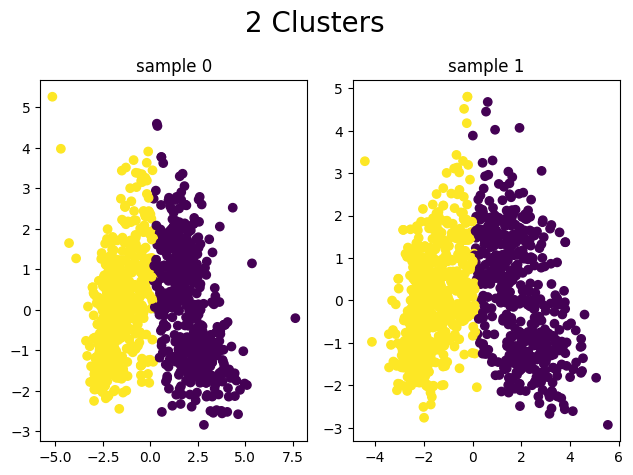

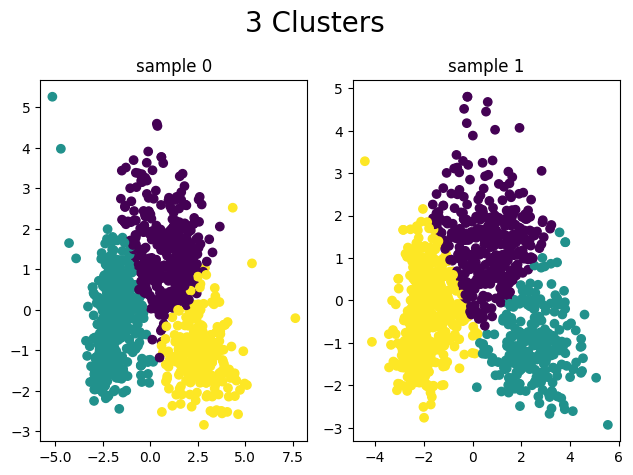

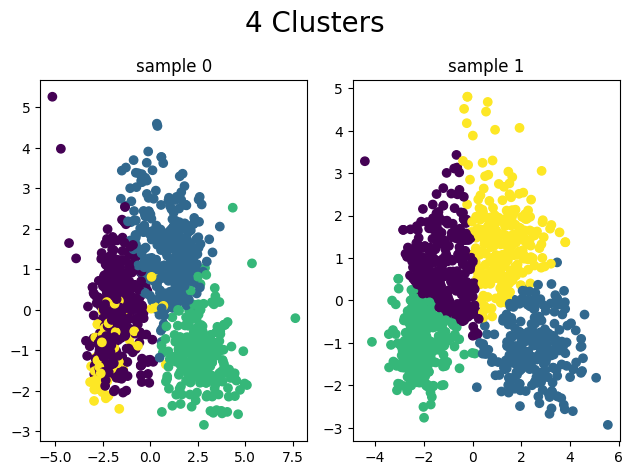

In [ ]:
# For each  number of clusters, plot the clusters using the
# PCA features for each sample
for cluster in range(2, 5):

    # Make a grid of subplots
    f, axarr = plt.subplots(1, 2)

    # Make a plot for each sample
    for i in range(2):

        # PCA-created features
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]

        # Cluster assignments
        c = ypred['clust{}_sample{}'.format(cluster, i)]

        # Assign the subplot to its place on the grid
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))

    # Space out the plots so that the headings don't overlap axis values
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [ ]:
# Get predicted clusters
full_pred = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred)

col_0,0,1,2
Response,,,
0,379,901,603
1,164,96,73


In [ ]:
def rand_index_score(ground_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(predictions), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(ground_truths), 2).sum()
    A = np.c_[(ground_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(ground_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [ ]:
rand_index_score(y, full_pred)

0.4537107512773916

In [ ]:
metrics.adjusted_rand_score(y, full_pred)

0.04293252866733962

In [ ]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.21547109130717013


**Hierarchical clustering**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)



In [ ]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.005157723880674296
The silhouette score of the Agglomerative Clustering solution: 0.12624747962320423


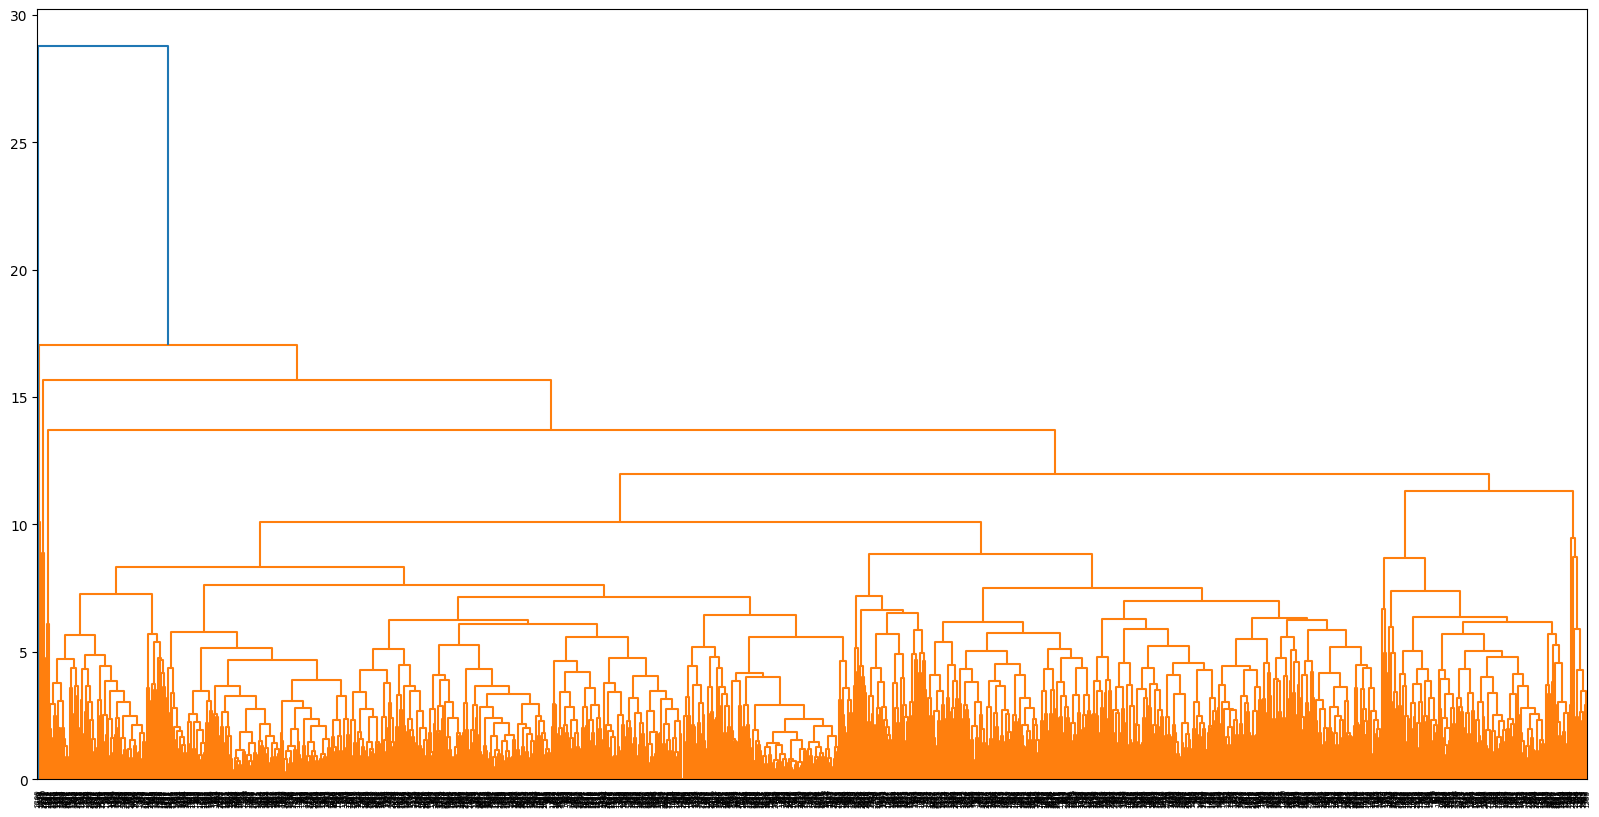

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

**The DBSCAN approach to clustering**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

In [ ]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: -0.06643774365326109


In [ ]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.14326894049987288


**Clustering with Gaussian mixture models**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [ ]:

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

clusters = gmm_cluster.fit_predict(X_std)

In [ ]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.02603818138431246
The silhouette score of the GMM solution: 0.1783032947921975


In [ ]:
# Relabeling
clusters = np.array([2 if x == 1 else 1 if x==2 else x for x in clusters])

pd.crosstab(y,clusters)

col_0,0,1,2
Response,,,
0,802,459,622
1,82,166,85


In [ ]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # Squaring emphasizes differences

**Dimensionality reduction with PCA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
np.random.seed(123)

indices = np.random.choice(len(data_df), 10000)


In [ ]:
# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

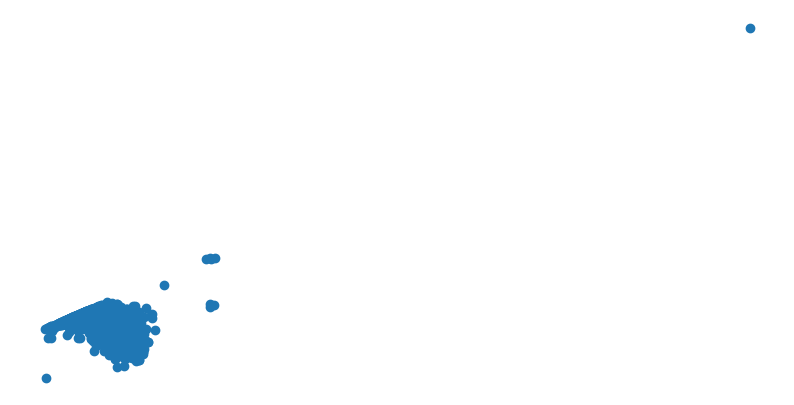

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**Dimensionality reduction with t-SNE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2216 samples in 0.003s...
[t-SNE] Computed neighbors for 2216 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2216
[t-SNE] Computed conditional probabilities for sample 2000 / 2216
[t-SNE] Computed conditional probabilities for sample 2216 / 2216
[t-SNE] Mean sigma: 500.560076
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.909058
[t-SNE] KL divergence after 300 iterations: 0.837435
t-SNE done! Time elapsed: 5.2836809158325195 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y.iloc[i]),
             color=colours[int(y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

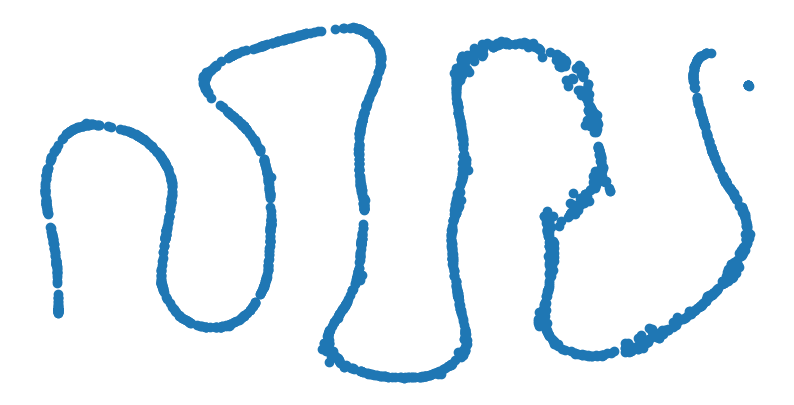

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**Dimensionality reduction with UMAP**

In [ ]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2efb7cbe09fdbf1a5bcee8a4bf3e0ef7b63eb97300fa3c64e876c37059286cfa
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 36.64535641670227 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y.iloc[i],
             color=colours[int(y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

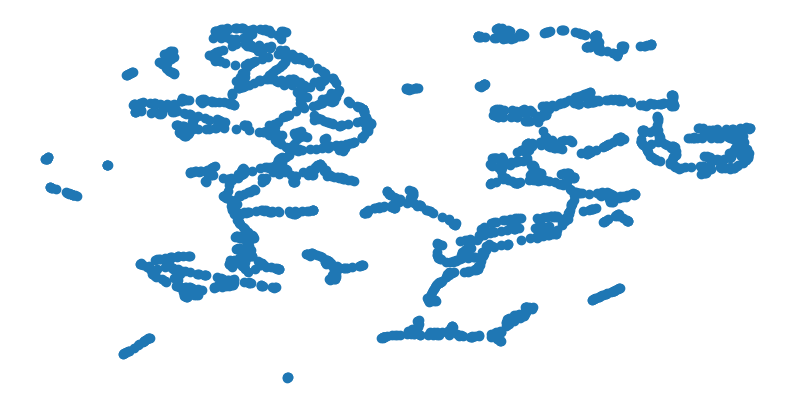

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

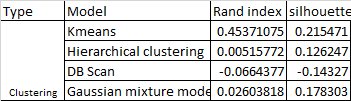

Comparing the RAND index and Silhouette scors in the clustering models, I find KMeans is the best. Because, the RAND index and Silhouette scores are high for KMeans.

Kmeans is the best in clustering

PCA is the best in Dimensionality reduction. because the groups are separated nicely compared to TSNE and UMAP.

Comparing Clustering and dimensionality reduction, Clustering [Kmeans] is the best.

In [ ]:
import matplotlib.pyplot as plt

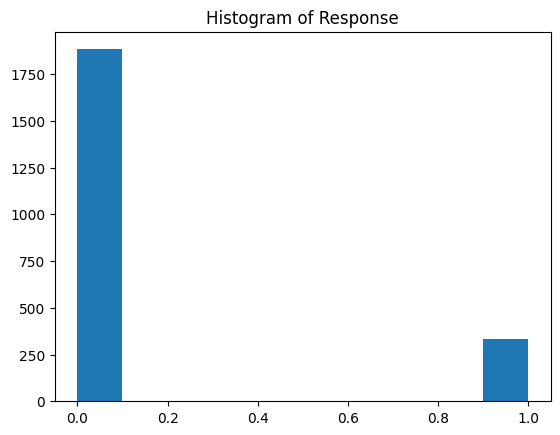

In [ ]:
plt.hist(data_df["Response"])
plt.title("Histogram of Response")
plt.show()

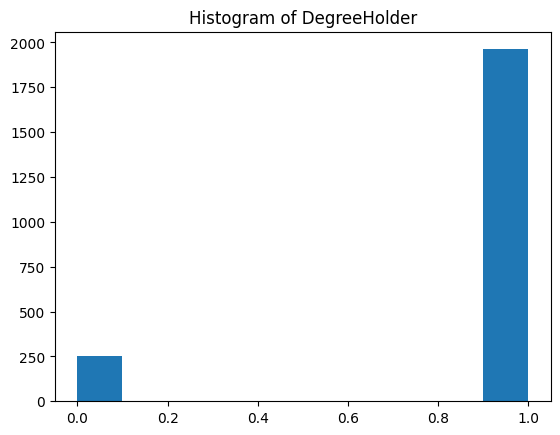

In [ ]:
plt.hist(data_df["DegreeHolder"])
plt.title("Histogram of DegreeHolder")
plt.show()

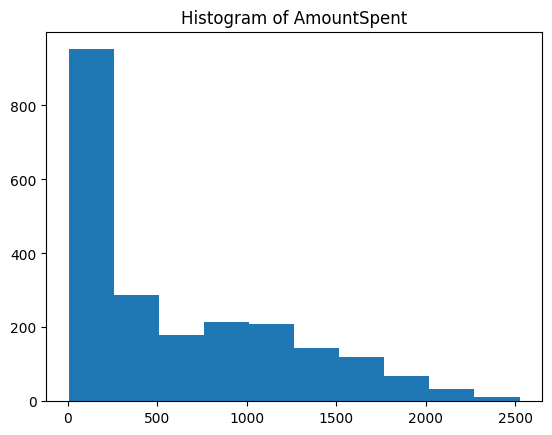

In [ ]:
plt.hist(data_df["AmountSpent"])
plt.title("Histogram of AmountSpent")
plt.show()

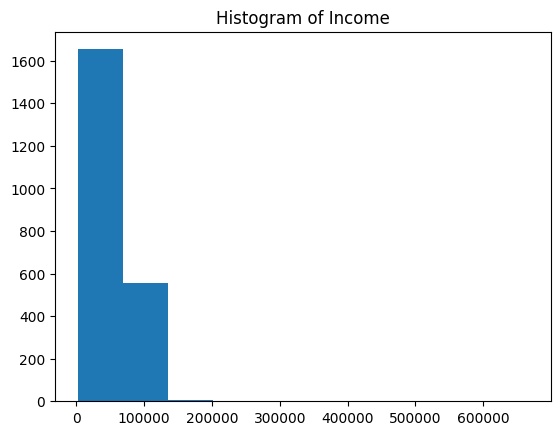

In [ ]:
plt.hist(data_df["Income"])
plt.title("Histogram of Income")
plt.show()

In [ ]:
# Get univariate statistics
data_df.describe()

,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,NoOfCampaignsAccepted,AmountSpent,Married_Living,DegreeHolder
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,55.179603,0.298285,607.075361,1.645307,0.885379
std,25173.076661,0.536896,0.544181,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,11.985554,0.679209,602.900476,0.478528,0.318636
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,47.000000,0.000000,69.000000,1.000000,1.000000
50%,51381.500000,0.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,54.000000,0.000000,396.500000,2.000000,1.000000
75%,68522.000000,1.000000,1.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,65.000000,0.000000,1048.000000,2.000000,1.000000
max,666666.000000,2.000000,2.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,131.000000,4.000000,2525.000000,2.000000,1.000000


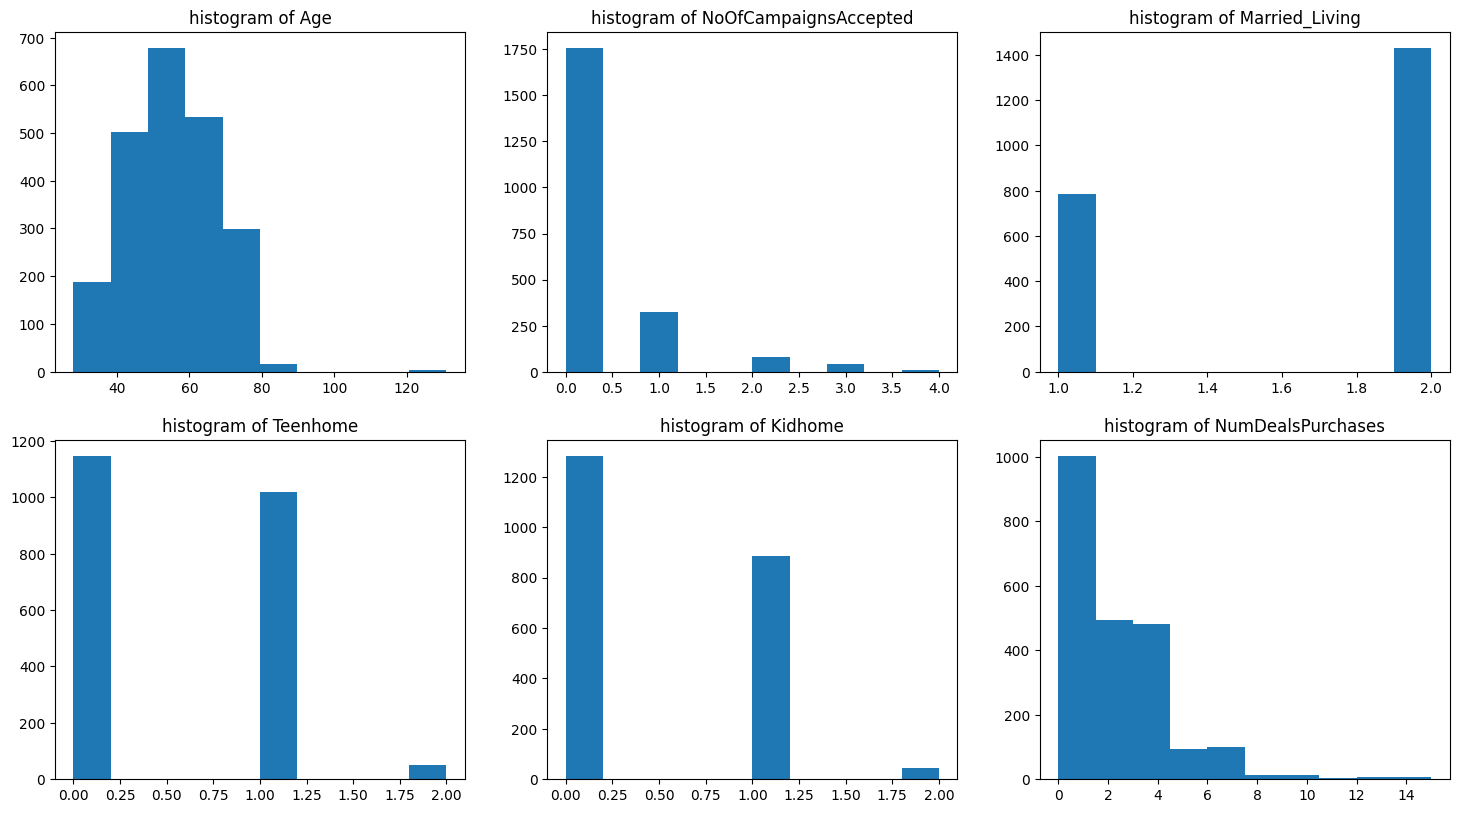

In [ ]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(data_df["Age"])
plt.title("histogram of Age")

plt.subplot(3, 3, 2)
plt.hist(data_df["NoOfCampaignsAccepted"])
plt.title("histogram of NoOfCampaignsAccepted")

plt.subplot(3, 3, 3)
plt.hist(data_df["Married_Living"])
plt.title("histogram of Married_Living")

# Histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(data_df["Teenhome"])
plt.title("histogram of Teenhome")

plt.subplot(3, 3, 5)
plt.hist(data_df["Kidhome"])
plt.title("histogram of Kidhome")

plt.subplot(3, 3, 6)
plt.hist(data_df["NumDealsPurchases"])
plt.title("histogram of NumDealsPurchases")


plt.show()

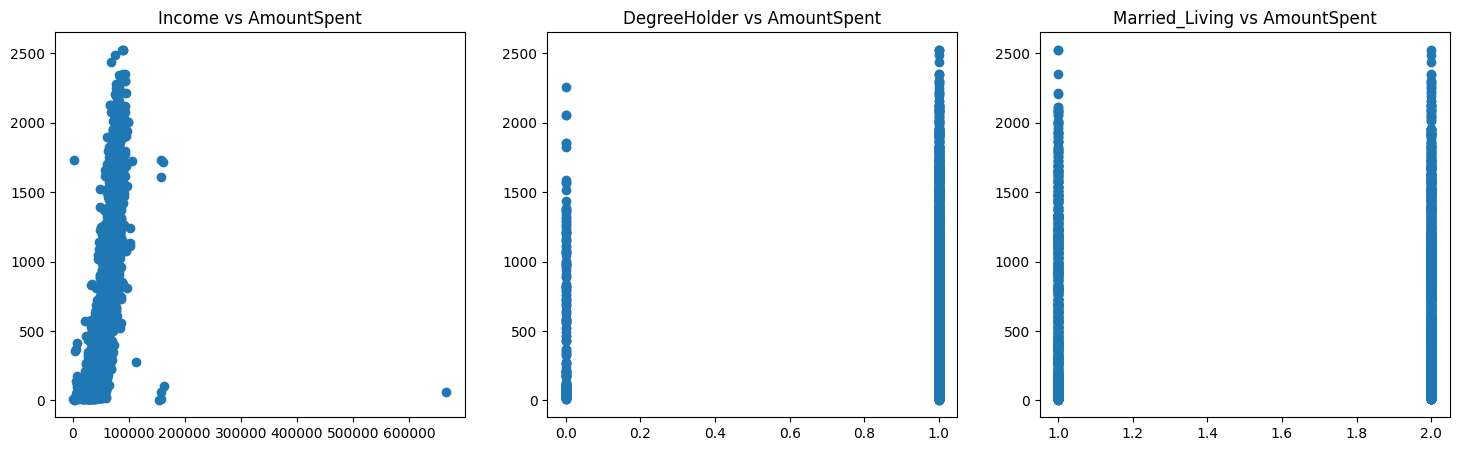

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data_df["Income"], df["AmountSpent"])
plt.title("Income vs AmountSpent")

plt.subplot(1,3,2)
plt.scatter(data_df["DegreeHolder"], df["AmountSpent"])
plt.title("DegreeHolder vs AmountSpent")

plt.subplot(1,3,3)
plt.scatter(data_df["Married_Living"], df["AmountSpent"])
plt.title("Married_Living vs AmountSpent")

plt.show()

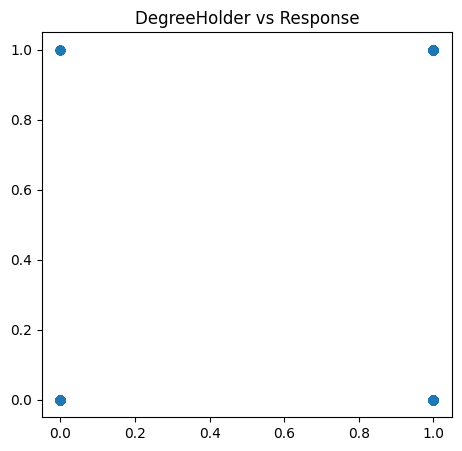

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data_df["DegreeHolder"], df["Response"])
plt.title("DegreeHolder vs Response")

plt.show()

In [ ]:
# Get correlation matrix
data_df.corr()

,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,NoOfCampaignsAccepted,AmountSpent,Married_Living,DegreeHolder
Income,1.000000,-0.428669,0.019133,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.133047,0.161791,0.308381,0.667576,0.004663,0.149023
Kidhome,-0.428669,1.000000,-0.039869,0.216913,-0.371977,-0.504501,-0.501349,0.447477,-0.077909,-0.233615,-0.211730,-0.557899,0.026788,-0.044299
Teenhome,0.019133,-0.039869,1.000000,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.153901,0.350791,-0.129572,-0.138153,0.031651,0.107729
NumDealsPurchases,-0.083101,0.216913,0.386246,1.000000,0.241440,-0.012118,0.066107,0.346048,0.003451,0.058668,-0.125727,-0.065854,0.026147,0.030333
NumWebPurchases,0.387878,-0.371977,0.162077,0.241440,1.000000,0.386868,0.516240,-0.051226,0.151431,0.153051,0.196823,0.528973,0.003455,0.094424
NumCatalogPurchases,0.589162,-0.504501,-0.112692,-0.012118,0.386868,1.000000,0.517840,-0.522004,0.219914,0.121764,0.346221,0.780482,-0.009855,0.087838
NumStorePurchases,0.529362,-0.501349,0.049737,0.066107,0.516240,0.517840,1.000000,-0.432398,0.036241,0.127891,0.202743,0.675181,0.004522,0.090419
NumWebVisitsMonth,-0.553088,0.447477,0.131240,0.346048,-0.051226,-0.522004,-0.432398,1.000000,-0.002209,-0.123904,-0.165502,-0.499082,0.003022,-0.065408
Response,0.133047,-0.077909,-0.153901,0.003451,0.151431,0.219914,0.036241,-0.002209,1.000000,-0.023692,0.427124,0.264127,-0.150161,0.056168
Age,0.161791,-0.233615,0.350791,0.058668,0.153051,0.121764,0.127891,-0.123904,-0.023692,1.000000,0.002289,0.113487,-0.002033,0.131056


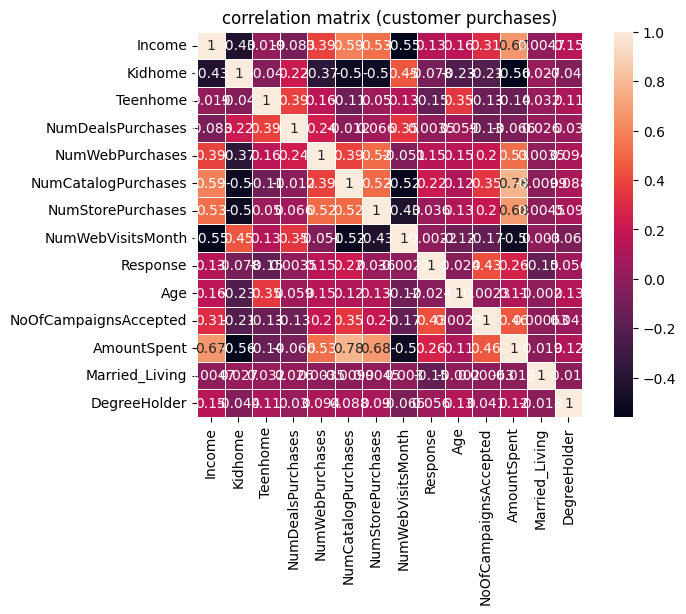

In [ ]:
# Make the correlation matrices
corrmat_df = data_df.corr()

# Heat maps are a great way to get
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (customer purchases)")

plt.show()

# Try to match the correlation numbers
# to the scatter plots above to get a
# sense of what each magnitude of
# correlation can look like.
